In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder

from matplotlib.cbook import boxplot_stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(precision=3)
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if round(x,0) == x else '{:,.2}'.format(x)
pd.set_option("display.max_rows", 10, "display.max_columns", 10)

In [2]:
default_city_name = 'Mumbai'

In [3]:
data_2019 = pd.read_csv('scraped_raw_data_'+default_city_name+'_2019.csv')

In [4]:
data_2020 = pd.read_csv('scraped_raw_data_'+default_city_name+'_2020.csv')

In [5]:
data_2019.dtypes

city                  object
title                 object
location              object
price(L)             float64
rate_persqft           int64
area_insqft            int64
building_status       object
last_updated_date     object
dtype: object

In [6]:
data_2020.dtypes

city                  object
title                 object
location              object
price(L)             float64
rate_persqft           int64
area_insqft            int64
building_status       object
last_updated_date     object
dtype: object

In [7]:
data_2019.drop(['title', 'price(L)', 'area_insqft', 'building_status', 'last_updated_date'], axis=1, inplace=True)
data_2020.drop(['title', 'price(L)', 'area_insqft', 'building_status', 'last_updated_date'], axis=1, inplace=True)

In [8]:
data_2019.head()

,city,location,rate_persqft
0,Mumbai,Andheri East,22694
1,Mumbai,Andheri East,17777
2,Mumbai,Andheri East,17322
3,Mumbai,Andheri East,16444
4,Mumbai,Andheri East,18000


In [9]:
data_2020.head()

,city,location,rate_persqft
0,Mumbai,Andheri East,26000
1,Mumbai,Andheri East,12375
2,Mumbai,Andheri East,14285
3,Mumbai,Andheri East,22125
4,Mumbai,Andheri East,13774


In [10]:
data_2019.groupby(by='location').describe()

rate_persqft                                                \
                      count    mean     std   min     25%     50%     75%   
location                                                                    
Ambernath East           13   4e+03   1e+03  1000    3883    4036    4207   
Andheri East              5 1.8e+04 2.4e+03 16444   17322   17777   18000   
Andheri West              4   22022 3.6e+03 16741 2.1e+04   23458 2.4e+04   
Bandra East               9 2.6e+04 7.2e+03 18847   19617   27500   32467   
Bandra West               8 4.2e+04 3.2e+03 35526 4.1e+04   42000   43469   
...                     ...     ...     ...   ...     ...     ...     ...   
Kandivali East            4   12219 1.9e+03 10000 1.1e+04 1.2e+04   13212   
Kandivali West           14 1.5e+04 1.4e+03 11300 1.4e+04   14200   15226   
Mahalaxmi                 7 3.2e+04 3.1e+03 28666 3.1e+04   32352 3.3e+04   
Powai                     3   18071 1.7e+03 16352   17243   18134 1.9e+04   
Worli                     9 4.1e+04   2e+04 20392   30709   34666   37164   

                      
                 max  
location              
Ambernath East  5341  
Andheri East   22694  
Andheri West   24431  
Bandra East    36363  
Bandra West    46357  
...              ...  
Kandivali East 14565  
Kandivali West 17000  
Mahalaxmi      38100  
Powai          19727  
Worli          74300  

[17 rows x 8 columns]

In [11]:
data_2020.groupby(by='location').describe()

rate_persqft                                                \
                      count    mean     std   min     25%     50%     75%   
location                                                                    
Ambernath East            8 4.4e+03 9.6e+02  3370 3.8e+03   4e+03 5.2e+03   
Andheri East             15 1.7e+04 3.8e+03 12375   14081   15496   18722   
Andheri West             16 3.4e+04 1.1e+04 13200 2.8e+04 3.4e+04 4.4e+04   
Bandra East              10 4.3e+04 1.2e+04 25263 3.5e+04   40964 5.1e+04   
Bandra West              12 5.3e+04   3e+04 28947 3.7e+04 4.1e+04 5.1e+04   
...                     ...     ...     ...   ...     ...     ...     ...   
Kandivali East           15 1.7e+04   4e+03 12500   13095   17200   19702   
Kandivali West            7 1.8e+04 3.3e+03 14342 1.6e+04   18229   19694   
Mahalaxmi                13 3.6e+04 6.7e+03 27448   30769   33907   42352   
Powai                    18 2.3e+04 6.6e+03 16365   17440   19561 2.8e+04   
Worli                    12 3.2e+04 7.9e+03 22222 2.5e+04   31248   35912   

                       
                  max  
location               
Ambernath East   6055  
Andheri East    26000  
Andheri West    47317  
Bandra East     64327  
Bandra West    129870  
...               ...  
Kandivali East  24302  
Kandivali West  23553  
Mahalaxmi       45000  
Powai           38834  
Worli           47987  

[17 rows x 8 columns]

Andheri East


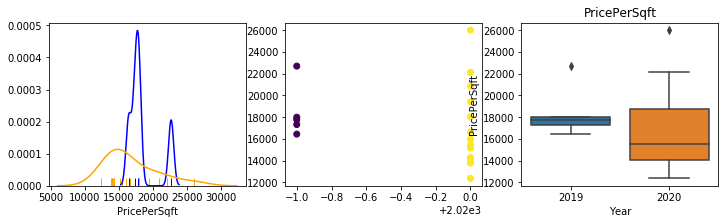

Andheri West


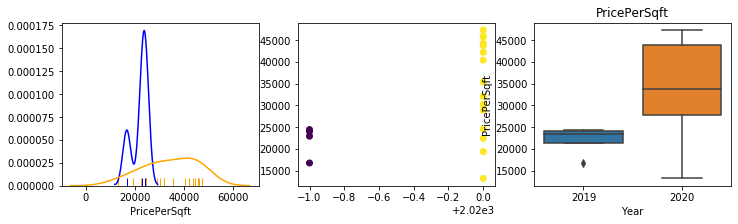

Bandra East


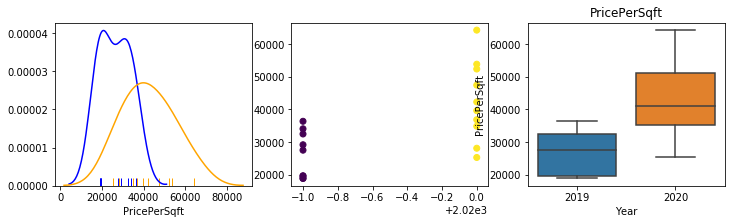

Bandra West


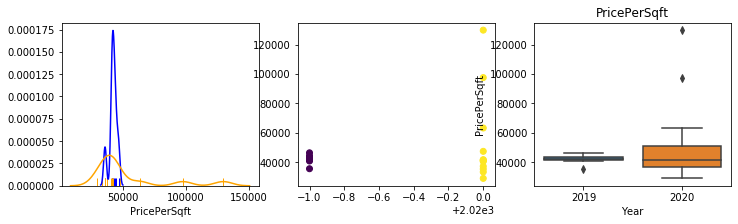

Borivali East


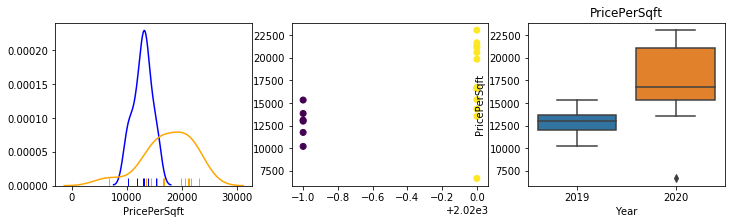

Borivali West


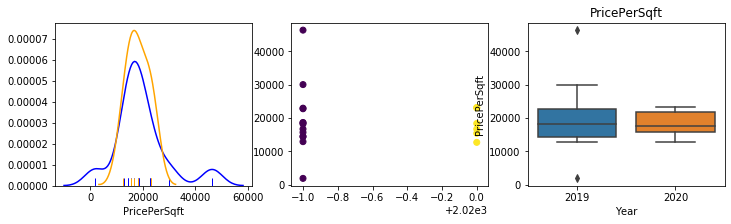

Dadar East


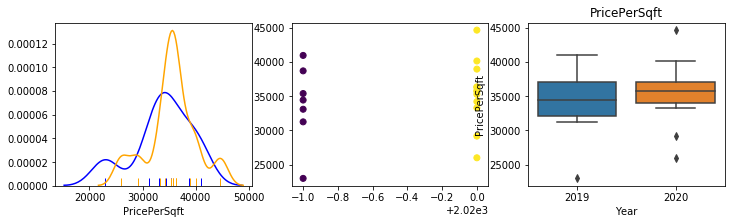

Dadar West


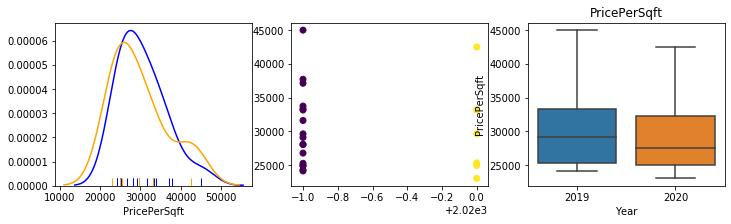

Dombivli East


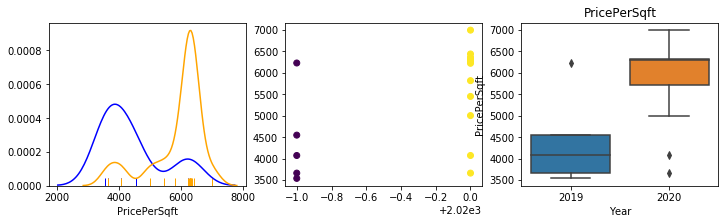

Dombivli West


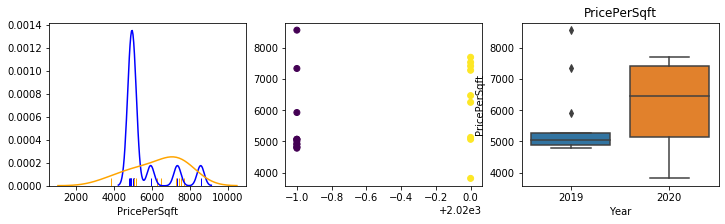

Kandivali East


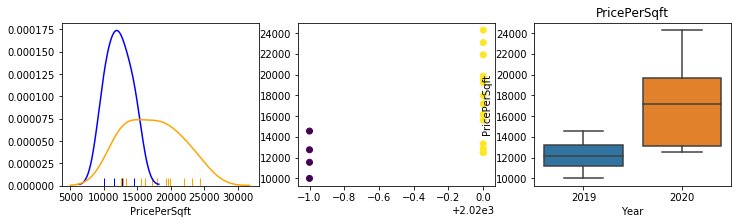

Kandivali West


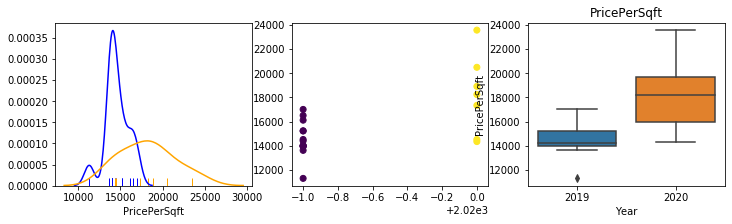

Mahalaxmi


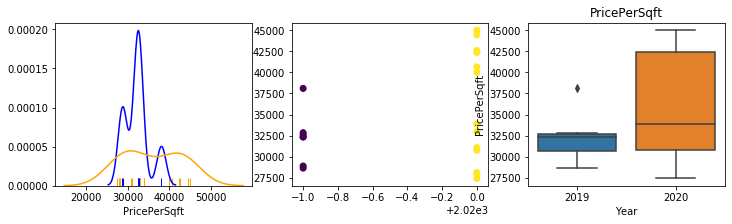

Powai


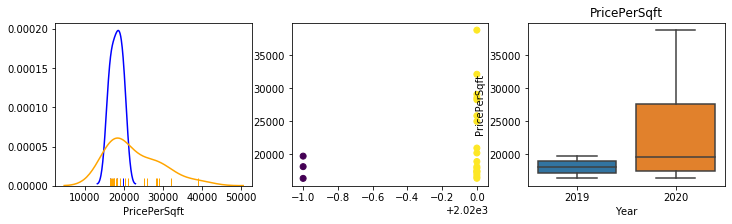

Ambernath East


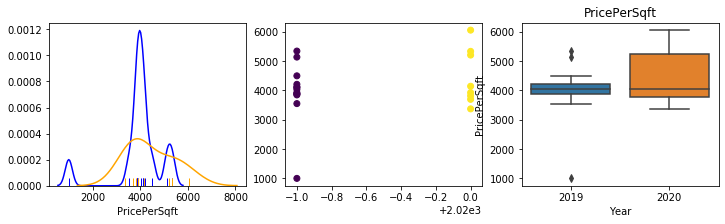

Worli


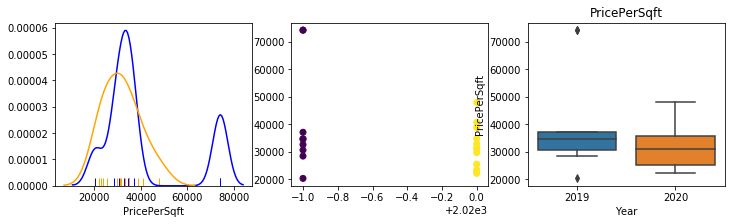

Juhu


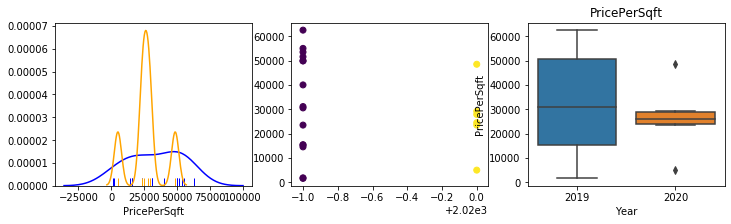

In [12]:
def printPairKdeAndBoxPlot(df, cols, hueVal):
    for col in cols:
        if(col != hueVal):   
            target_0 = df[df[hueVal]==2019]
            target_1 = df[df[hueVal]==2020]
            f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,3))
            sns.distplot(target_0[col], hist=False, rug=True, ax=ax1, color='blue')
            sns.distplot(target_1[col], hist=False, rug=True, ax=ax1, color='orange')
            ax2.scatter(df[hueVal], df[col], c=df[hueVal])
            sns.boxplot(x=hueVal, y=col, data=df, ax=ax3)
            plt.title(col)
            plt.show() 

areas = np.array(data_2019['location'].unique())

for area in areas:
    print(area)
    area_2019_data = pd.DataFrame(data_2019[data_2019['location']==area].reset_index()['rate_persqft'])
    area_2019_data.columns = ['PricePerSqft']
    area_2019_data['Year'] = 2019
    area_2020_data = pd.DataFrame(data_2020[data_2020['location']==area].reset_index()['rate_persqft'])
    area_2020_data.columns = ['PricePerSqft']
    area_2020_data['Year'] = 2020
    area_data = pd.concat([area_2019_data, area_2020_data])
    printPairKdeAndBoxPlot(area_data, ['PricePerSqft'], 'Year')

In [14]:
from scipy.stats import ttest_ind

for area in areas:
    data_2019_new = data_2019[data_2019['location']==area]['rate_persqft']
    data_2020_new = data_2020[data_2020['location']==area]['rate_persqft']
    mean_of_area_2019 = data_2019_new.mean()
    mean_of_area_2020 = data_2020_new.mean()
    difference_in_rate = mean_of_area_2020 - mean_of_area_2019

    #Calculate the T-test and P-Value for TWO INDEPENDENT samples
    tstat, pval = ttest_ind(data_2019_new, data_2020_new) 
    if pval < 0.05:
        if tstat < 0:
            state = 'increased'
        else:
            state = 'decreased'
        print(area, state, ': There is a significant difference between prices between 2019 & 2020')
        print('        P Values : ', pval)
        print('        T Statistic : ', tstat)
        print('        Mean 2020 : ', mean_of_area_2020)
        print('        Mean 2019 : ', mean_of_area_2019)
        print('        Difference in Rate : ', difference_in_rate)
    else:
        print(area, ': There is no significant difference between prices between 2019 & 2020')
        print('        P Values : ', pval)
        print('        T Statistic : ', tstat)
        print('        Mean 2020 : ', mean_of_area_2020)
        print('        Mean 2019 : ', mean_of_area_2019)
        print('        Difference in Rate : ', difference_in_rate)

Andheri East : There is no significant difference between prices between 2019 & 2020
        P Values :  0.3831025479331691
        T Statistic :  0.8940335295337783
        Mean 2020 :  16816.266666666666
        Mean 2019 :  18447.4
        Difference in Rate :  -1631.133333333335
Andheri West increased : There is a significant difference between prices between 2019 & 2020
        P Values :  0.03845701156758795
        T Statistic :  -2.2333694036698075
        Mean 2020 :  34239.6875
        Mean 2019 :  22022.0
        Difference in Rate :  12217.6875
Bandra East increased : There is a significant difference between prices between 2019 & 2020
        P Values :  0.002804434563029703
        T Statistic :  -3.4899586852325952
        Mean 2020 :  42505.2
        Mean 2019 :  26276.222222222223
        Difference in Rate :  16228.977777777774
Bandra West : There is no significant difference between prices between 2019 & 2020
        P Values :  0.3178681576008366
        T Statistic